In [1]:
import itertools
from collections import defaultdict
from random import randint
import time
from datetime import datetime

# Class to represent a graph 
class Graph: 

    def __init__(self, vertices, generate_complete_graph=False, min_weight=1, max_weight=100): 
        self.V = vertices
        self.graph = []
        if generate_complete_graph:
            combinations = itertools.combinations(range(vertices), 2)
            for edge in combinations:
                self.addEdge(edge[0], edge[1], randint(min_weight, max_weight))

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
        
    def printArr(self, dist): 
        print("Vertex Distance from Source")
        for i in range(self.V): 
            print("% d \t\t % d" % (i, dist[i]))

    def BellmanFord(self, src, return_speed=False, return_operations_number=False):
        
        operations_counter = 0
        
        dist = [float("Inf")] * self.V
        dist[src] = 0
        
        # timestamp of the beginning of algorithm work
        timestamp = datetime.now()
        for i in range(self.V - 1): 
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]: 
                    dist[v] = dist[u] + w
                    operations_counter += 2
                else:
                    operations_counter += 1

        for u, v, w in self.graph: 
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                operations_counter += 1
                if return_speed:
                    if return_operations_number:
                        return ("Graph contains negative weight cycle", datetime.now() - timestamp, operations_counter)
                    else:
                        return ("Graph contains negative weight cycle", datetime.now() - timestamp)
                else:
                    if return_operations_number:
                        return ("Graph contains negative weight cycle", operations_counter)
                    else:
                        return ("Graph contains negative weight cycle")
        
        if return_speed:
            if return_operations_number:
                return (dist, datetime.now() - timestamp, operations_counter)
            else:
                return (dist, datetime.now() - timestamp)
        else:
            if return_operations_number:
                return (dist, operations_counter)
            else:
                return (dist)

# dictionary with experiments data
experiments_data = {}
number_of_vertices = list(range(10, 510, 10))

if __name__ == '__main__':
    
    for v in number_of_vertices:
        graph = Graph(v, True)
        dist, time, operations = graph.BellmanFord(0, True, True)
        experiments_data[v] = {
            'vertices_number': v,
            'time': time,
            'operations': operations
        }
        print(
            f"Vertices number:{v}\n"
            f"Time: {str(time)}\n"
            f"Operations: {operations}\n"
            f"======================"
        )

Vertices number:10
Time: 0:00:00
Operations: 418
Vertices number:20
Time: 0:00:00.002000
Operations: 3657
Vertices number:30
Time: 0:00:00.003999
Operations: 12684
Vertices number:40
Time: 0:00:00.010000
Operations: 30527
Vertices number:50
Time: 0:00:00.020000
Operations: 60141
Vertices number:60
Time: 0:00:00.035000
Operations: 104616
Vertices number:70
Time: 0:00:00.053000
Operations: 166852
Vertices number:80
Time: 0:00:00.078000
Operations: 249918
Vertices number:90
Time: 0:00:00.115001
Operations: 356755
Vertices number:100
Time: 0:00:00.154000
Operations: 490411
Vertices number:110
Time: 0:00:00.205000
Operations: 653851
Vertices number:120
Time: 0:00:00.268000
Operations: 850122
Vertices number:130
Time: 0:00:00.337999
Operations: 1082169
Vertices number:140
Time: 0:00:00.421001
Operations: 1353054
Vertices number:150
Time: 0:00:00.511000
Operations: 1665700
Vertices number:160
Time: 0:00:00.631000
Operations: 2023174
Vertices number:170
Time: 0:00:00.745000
Operations: 2428379

# Dependence of executing time on number of vertices

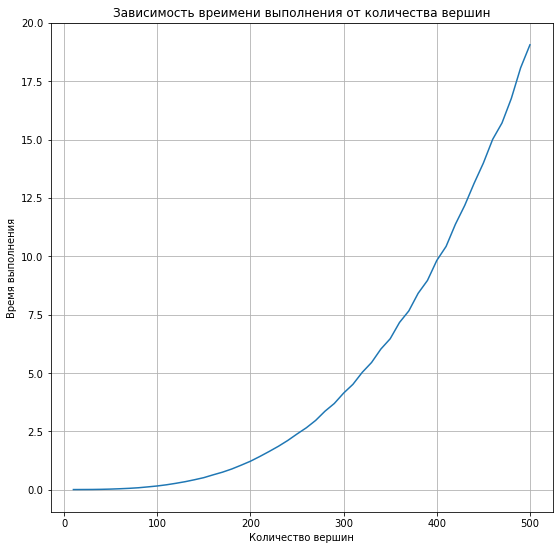

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))

plt.title('Зависимость вреимени выполнения от количества вершин')
plt.xlabel('Количество вершин')
plt.ylabel('Время выполнения')
plt.grid()

x = []
y = []
for key, value in experiments_data.items():
    x.append(key)
    y.append(value['time'].total_seconds())

plt.plot(x, y)
plt.show()

# Dependence of the number of executed operations on the number of vertices

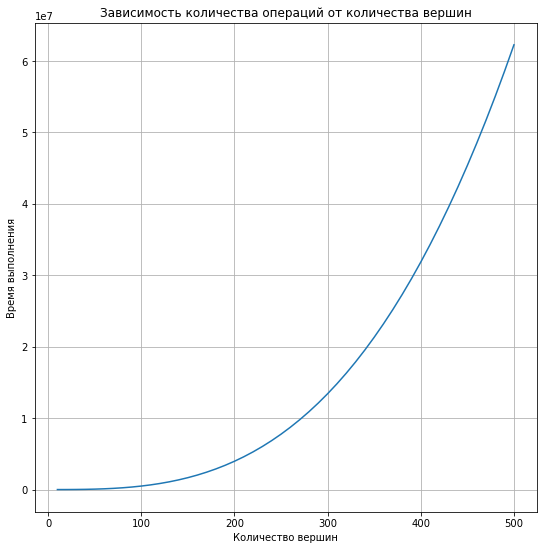

In [3]:
plt.figure(figsize=(9, 9))
plt.title('Зависимость количества операций от количества вершин')
plt.xlabel('Количество вершин')
plt.ylabel('Время выполнения')
plt.grid()

x = []
y = []
for key, value in experiments_data.items():
    x.append(key)
    y.append(value['operations'])

plt.plot(x, y)
plt.show()

# Ratio of executing time at 2n values to executing time at n values

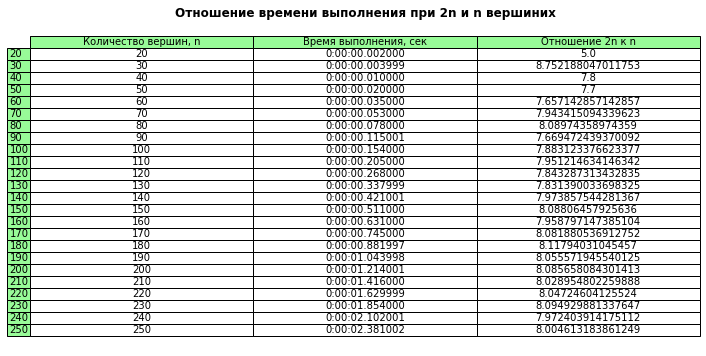

In [4]:
columns_labels = ['Количество вершин, n', 'Время выполнения, сек', 'Отношение 2n к n']

experiments_number = len(experiments_data)
diff = list(experiments_data.keys())[1] - list(experiments_data.keys())[0]

# first expetiment takes 0 time (algorithm is too fast)
rows_labels = [
    x for x in range(
        list(experiments_data.keys())[1],
        ((experiments_number // 2) + 1) * diff,
        diff
    )
]

cell_text = [
    [
        x,
        str(experiments_data[x]['time']),
        experiments_data[x * 2]['time'].total_seconds() / 
        experiments_data[x]['time'].total_seconds()
    ]
    for x in rows_labels
]

fig, ax = plt.subplots()
fig.set(size_inches=(12, 6))
ax.set_axis_off() 
table = ax.table( 
    cellText = cell_text,
    rowLabels = rows_labels,
    colLabels = columns_labels,
    rowColours =["palegreen"] * len(rows_labels),
    colColours =["palegreen"] * len(columns_labels),
    cellLoc ='center',
    loc = 'center'
)         
   
ax.set_title('Отношение времени выполнения при 2n и n вершиних', 
             fontweight ="bold") 
   
plt.show() 

# Ratio of amount of operations at 2n values to amount of operations at n values

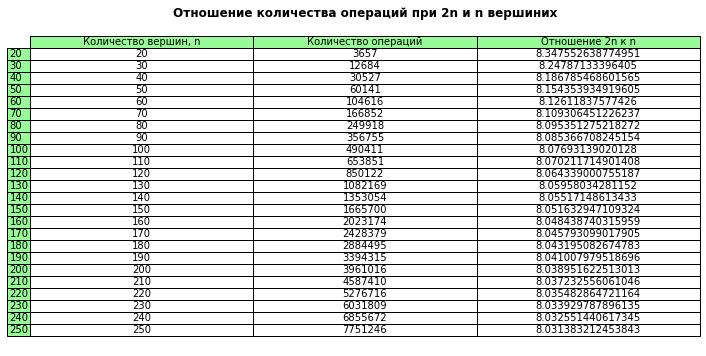

In [5]:
columns_labels = ['Количество вершин, n', 'Количество операций', 'Отношение 2n к n']

experiments_number = len(experiments_data)
diff = list(experiments_data.keys())[1] - list(experiments_data.keys())[0]

# first expetiment takes 0 time (algorithm is too fast)
rows_labels = [
    x for x in range(
        list(experiments_data.keys())[1],
        ((experiments_number // 2) + 1) * diff,
        diff
    )
]

cell_text = [
    [
        x,
        experiments_data[x]['operations'],
        float(experiments_data[x * 2]['operations']) / 
        float(experiments_data[x]['operations'])
    ]
    for x in rows_labels
]

fig, ax = plt.subplots()
fig.set(size_inches=(12, 6))
ax.set_axis_off()
table = ax.table( 
    cellText = cell_text,
    rowLabels = rows_labels,
    colLabels = columns_labels,
    rowColours =["palegreen"] * len(rows_labels),
    colColours =["palegreen"] * len(columns_labels),
    cellLoc ='center',
    loc = 'center'
)         
   
ax.set_title('Отношение количества операций при 2n и n вершиних', 
             fontweight ="bold") 
   
plt.show() 

# Results
According to the presented graphs and tables algorithm's executing time and amount of operations depends on vertices amount nonlinearly i.e. algorithms complexity equals to O(n^3). It differs from theoretical complexity because I am using complete graphs so number of grahps' edges is n*(n-1)/2 (n - number of vertices), thus complexity is O(n^2(n-1)/2) = O(n^3).